#Authenticate to Kaggle

In [ ]:
!pip install kaggle --quiet

In [ ]:
%env KAGGLE_USERNAME=jiabaozhuang
%env KAGGLE_KEY=5a9074c902ea26301cb9c242222a49b0

env: KAGGLE_USERNAME=jiabaozhuang
env: KAGGLE_KEY=5a9074c902ea26301cb9c242222a49b0


In [ ]:
!kaggle datasets download -d sakshigoyal7/credit-card-customers

Dataset URL: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers
License(s): CC0-1.0
100% 379k/379k [00:00<00:00, 764kB/s]
100% 379k/379k [00:00<00:00, 764kB/s]


In [ ]:
!unzip credit-card-customers.zip

Archive:  credit-card-customers.zip
  inflating: BankChurners.csv        


#Data Loading

In [ ]:
# Import all of the packages we will need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns

In [ ]:
# Load data
df = pd.read_csv("BankChurners.csv")

# Asked to ignore last two columns
df = df[df.columns[:-2]]
df = df.drop('CLIENTNUM', axis=1)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
df.shape

(10127, 20)

In [ ]:
numerical_features = df.select_dtypes(include=[np.number])
numerical_features.describe().T.round(4)

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.3260,8.0168,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.3462,1.2989,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.9284,7.9864,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.8126,1.5544,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.3412,1.0106,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.4553,1.1062,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.9537,9088.7767,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.8141,814.9873,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.1396,9090.6853,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.7599,0.2192,0.0,0.631,0.736,0.859,3.397


In [ ]:
categorical_features = df.select_dtypes(include=[object])
categorical_features.describe().T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [ ]:
na_count = df.isna().sum()

na_count

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [ ]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

#Exploratory Data Analysis

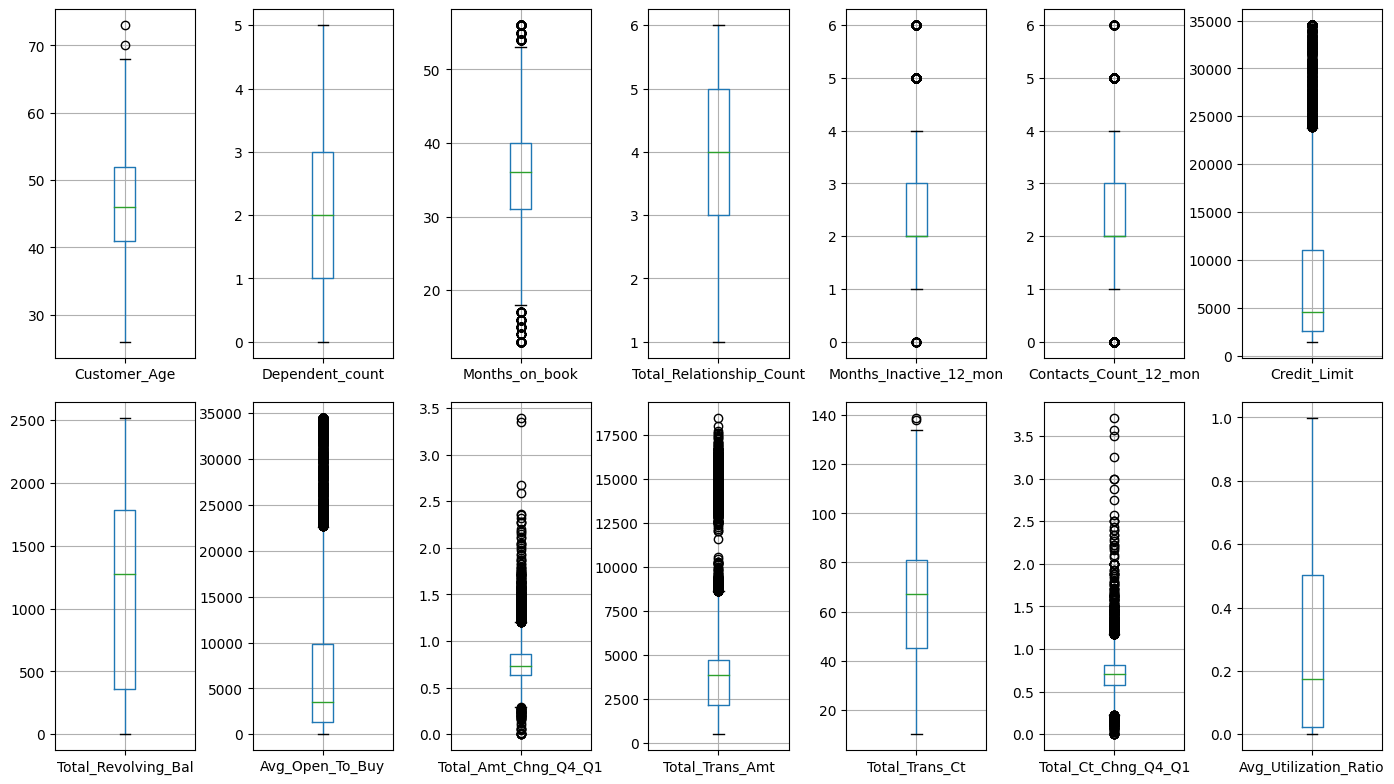

In [ ]:
# Box plot to determine outliers
fig, axes = plt.subplots(nrows=2,ncols=7)
fig.set_figheight(8)
fig.set_figwidth(14)
fig.tight_layout()

i = 0
j = 0
for cols in numerical_features.columns:
  numerical_features.boxplot(column=cols, ax=axes[i, j])
  j = j + 1
  if j == 7:
    j = 0
    i = i + 1

plt.show()

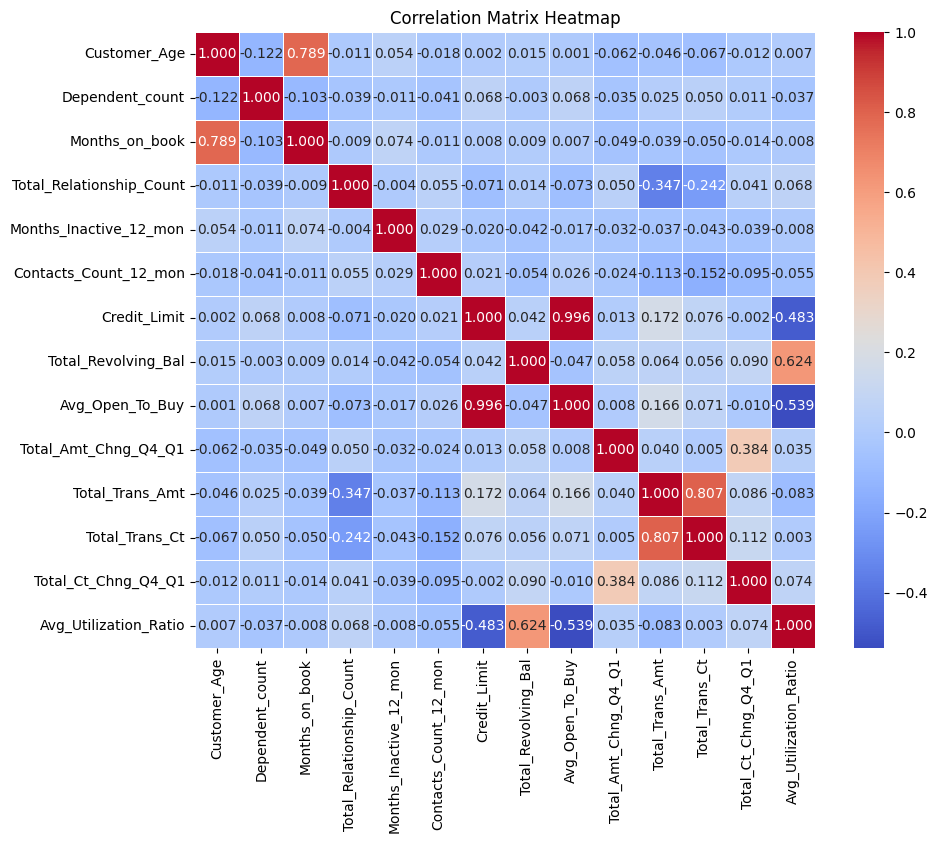

In [ ]:
corr_matrix = numerical_features.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
fig = px.histogram(df, x='Customer_Age', nbins=20, title='Distribution of Customer Ages')
fig.update_layout(height=500, width=800)
fig.show()

In [ ]:
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('', '<b>Platinum Card Holders</b>', '<b>Blue Card Holders</b>', 'Residuals'),
    vertical_spacing=0.09,
    specs=[
        [{"type": "pie", "rowspan": 2}, {"type": "pie"}],
        [None, {"type": "pie"}]
    ]
)
fig.add_trace(
    go.Pie(
        values=df['Gender'].value_counts().values,
        labels=['Female', 'Male'],
        hole=0.3,
        pull=[0, 0.1]  # Adjust the pull to have only two values since we have two genders
    ),
    row=1, col=1
)
fig.add_trace(
    go.Pie(
        labels=['Female Platinum Card Holders', 'Male Platinum Card Holders'],
        values=df[df['Card_Category'] == "Platinum"]['Gender'].value_counts().values,
        hole=0.3,
        pull=[0, 0.1]  # Adjust the pull to have only two values
    ),
    row=1, col=2
)
fig.add_trace(
    go.Pie(
        labels=['Female Blue Card Holders', 'Male Blue Card Holders'],
        values=df[df['Card_Category'] == "Blue"]['Gender'].value_counts().values,
        hole=0.3,
        pull=[0, 0.1]  # Adjust the pull to have only two values
    ),
    row=2, col=2
)
fig.update_layout(
    height=800,
    showlegend=True,
    title_text="<b>Distribution of Gender and Different Card Categories</b>"
)
fig.show()
"""The dataset shows a balanced gender distribution: 52.9% female and 47.1% male. This balance is maintained across Platinum and Blue cardholder categories."""

'The dataset shows a balanced gender distribution: 52.9% female and 47.1% male. This balance is maintained across Platinum and Blue cardholder categories.'

In [ ]:
fig = px.pie(df, names='Education_Level', title='Proportion Of Education Levels', hole=0.33)
fig.show()
"""Assuming 'Unknown' does not significantly represent formal education, the data shows that over 70% of our customers have formal education. Among these, nearly 10% have attained an education level higher than a graduate degree."""

"Assuming 'Unknown' does not significantly represent formal education, the data shows that over 70% of our customers have formal education. Among these, nearly 10% have attained an education level higher than a graduate degree."

In [ ]:
fig = px.pie(df, names='Marital_Status', title='Proportion of Different Marital Statuses', hole=0.33)
fig.show()
"""Close to half of the bank's customers are married (46.3%), while a significant proportion are single (38.9%). A smaller fraction, approximately 7.4%, are divorced."""

"Close to half of the bank's customers are married (46.3%), while a significant proportion are single (38.9%). A smaller fraction, approximately 7.4%, are divorced."

In [ ]:
fig = px.pie(df, names='Attrition_Flag', title='Proportion of Churn vs Not Churn Customers', hole=0.33)
fig.show()
"""In our dataset with 16% churn customers, I will use SMOTE to balance the class distribution, supplemented by adjusted class weights in the modeling process. This combined method will help the model capture churn tendencies more effectively. Evaluation will focus on metrics like the F1-score and AUC-ROC for a nuanced assessment of model performance."""

'In our dataset with 16% churn customers, I will use SMOTE to balance the class distribution, supplemented by adjusted class weights in the modeling process. This combined method will help the model capture churn tendencies more effectively. Evaluation will focus on metrics like the F1-score and AUC-ROC for a nuanced assessment of model performance.'

#Create a Data Pipeline

In [ ]:
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Manual encoding
df['Attrition_Flag'] = df['Attrition_Flag'].replace({'Attrited Customer': 1, 'Existing Customer': 0})
df.Gender = df.Gender.replace({'F':1,'M':0})

# Define transformers for numerical and categorical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output = False))
])


In [ ]:
# Define numerical and categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Remove target variable from numerical columns
numerical_columns = numerical_columns.drop('Attrition_Flag')

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ], remainder='passthrough')

# Create a pipeline with the preprocessor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)])

# Prepare target and feature sets
X = df.drop(['Attrition_Flag'], axis=1)
y = df['Attrition_Flag']
X_preprocessed = pipeline.fit_transform(X)


#ROC curves

In [ ]:
from sklearn import metrics

def get_model_roc(models, Xs_test, names, Y_test):
    plt.figure(figsize=(10, 8))  # Set the figure size for better readability
    plt.rcParams['figure.dpi'] = 100  # Set the resolution of the figure
    plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='No Skill')  # Plot the line of no skill once

    # Iterate over the models to plot each ROC curve
    for model, X_test, name in zip(models, Xs_test, names):
        probs = model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class
        fpr, tpr, thresholds = metrics.roc_curve(Y_test, probs)  # Calculate FPR and TPR for the ROC
        plt.plot(fpr, tpr, label=f"{name} (AUC = {metrics.roc_auc_score(Y_test, probs):.3f})")  # Plot the ROC curve

    # Adding labels, title and legend
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Comparison")
    plt.legend(title="Models", loc="lower right")
    plt.grid(True)
    plt.show()


# Fit and Parameter Tune models


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import accuracy_score, f1_score
from imblearn.over_sampling import SMOTE

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Apply SMOTE to the preprocessed training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define the models for classification
models = {
    'NaiveBayes': GaussianNB(), # Baseline Model
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42)
}

# Define the hyperparameter grids for each model
param_grids = {
    'NaiveBayes': {},
    'LogisticRegression': {
        'C': [0.1, 1, 10]
    },
    'KNN': {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
    },
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    },
    'GradientBoosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
}

# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Train and tune the models using GridSearchCV
grids = {}
best_models = []
model_names = []
Xs_test = []

for model_name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='accuracy', n_jobs=-1, verbose=2)
    grid_search.fit(X_train_smote, y_train_smote)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    best_models.append(best_model)
    model_names.append(model_name)
    Xs_test.append(X_test)

    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best accuracy for {model_name}: {best_score}\n')


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for NaiveBayes: {}
Best accuracy for NaiveBayes: 0.8022349654462579

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best parameters for LogisticRegression: {'C': 0.1}
Best accuracy for LogisticRegression: 0.8587707690045582

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best accuracy for KNN: 0.9481693868548743

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}
Best accuracy for RandomForest: 0.9790471989413322

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best accuracy for GradientBoosting: 0.9828701661520366



In [ ]:
from sklearn.neural_network import MLPClassifier

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Create an MLPClassifier instance
mlp = MLPClassifier(random_state=42, max_iter=10000, n_iter_no_change=3, learning_rate_init=0.001)

# Define the parameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(20,), (25,), (30,)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.005, 0.01, 0.015],
    'learning_rate': ['constant'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Create the GridSearchCV object
grid_search_mlp = GridSearchCV(mlp, param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose=1)

# Fit the model on the training data
grid_search_mlp.fit(X_train_scaled, y_train)

# Best MLP model
best_mlp = grid_search_mlp.best_estimator_

# Print the best parameters found during the search
print("Best parameters found: ", grid_search_mlp.best_params_)

# Evaluate the model on the test data
y_pred = grid_search_mlp.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy: ", test_accuracy)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found:  {'activation': 'relu', 'alpha': 0.015, 'hidden_layer_sizes': (25,), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'solver': 'adam'}
Test accuracy:  0.9318854886475815


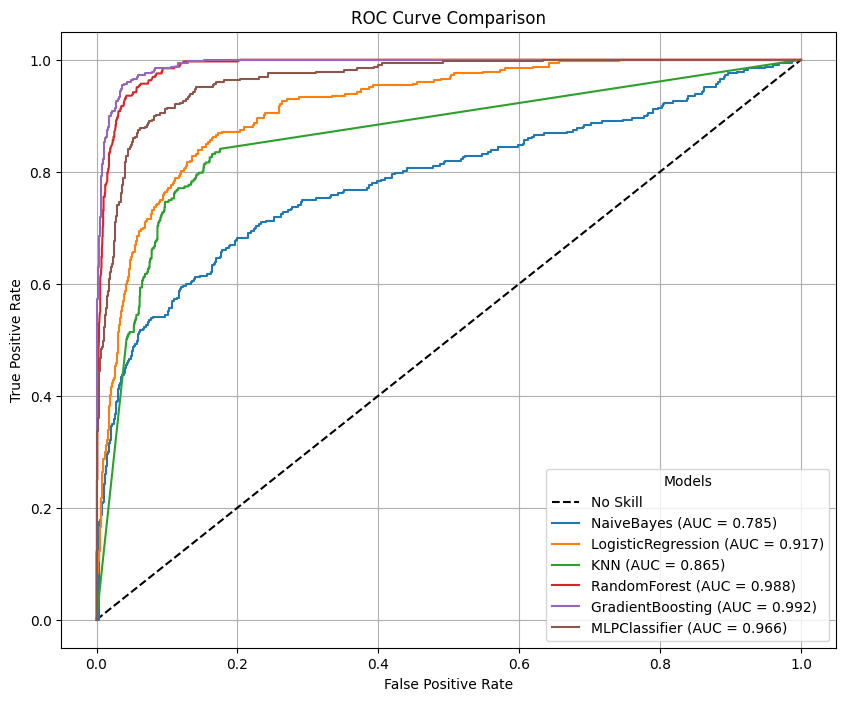

In [ ]:
best_models.append(best_mlp)
model_names.append('MLPClassifier')
Xs_test.append(X_test_scaled)

get_model_roc(best_models, Xs_test, model_names, y_test)

#Feature Engineering

In [ ]:
X_preprocessed.shape

(10127, 36)

In [ ]:
from sklearn.preprocessing import FunctionTransformer

# feature engineering functions
def custom_features(df):
    df_out = df.copy()
    # Interaction features
    df_out['Avg_Transaction_Amt'] = df_out['Total_Trans_Amt'] / df_out['Total_Trans_Ct']
    df_out['Utilized_Credit_Limit'] = df_out['Credit_Limit'] * df_out['Avg_Utilization_Ratio']
    # Aggregated features
    df_out['Inactive_Months_Ratio'] = df_out['Months_Inactive_12_mon'] / df_out['Months_on_book']
    # Rate of change features
    df_out['Amt_Chng_Rate'] = df_out['Total_Amt_Chng_Q4_Q1'] / df_out['Months_on_book']
    df_out['Ct_Chng_Rate'] = df_out['Total_Ct_Chng_Q4_Q1'] / df_out['Months_on_book']
    # Composite features
    df_out['Actual_Credit_Utilization'] = df_out['Total_Revolving_Bal'] / df_out['Credit_Limit']
    # Flag features
    df_out['Zero_Revolving_Balance'] = (df_out['Total_Revolving_Bal'] == 0).astype(int)

    return df_out

# Apply the custom feature engineering function
feature_engineering_transformer = FunctionTransformer(custom_features)


In [ ]:
# Define numerical and categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
# Update numerical column
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Remove target variable from numerical columns
numerical_columns = numerical_columns.drop('Attrition_Flag')

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],remainder = 'passthrough')

# Create a pipeline with the preprocessor
pipeline_fe = Pipeline(steps=[
    ('fe', feature_engineering_transformer),
    ('preprocessor', preprocessor)])

# Apply the pipeline to your dataset
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']
X_preprocessed_fe = pipeline_fe.fit_transform(X)


In [ ]:
X_preprocessed_fe.shape

(10127, 43)

In [ ]:
# Split the data into training and testing sets
X_train_fe, X_test_fe, y_train, y_test = train_test_split(X_preprocessed_fe, y, test_size=0.2, random_state=42)

# Apply SMOTE to the preprocessed training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_fe, y_train)

# Define the models for classification
models = {
    'NaiveBayes': GaussianNB(), # Baseline Model
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=10000),
    'KNN': KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42)
}

# Define the hyperparameter grids for each model
param_grids = {
    'NaiveBayes': {},
    'LogisticRegression': {
        'C': [0.1, 1, 10]
    },
    'KNN': {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
    },
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    },
    'GradientBoosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
}

# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Train and tune the models using GridSearchCV
grids = {}
best_models = []
model_names = []
Xs_test = []

for model_name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='accuracy', n_jobs=-1, verbose=2)
    grid_search.fit(X_train_smote, y_train_smote)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    best_models.append(best_model)
    model_names.append(model_name)
    Xs_test.append(X_test_fe)

    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best accuracy for {model_name}: {best_score}\n')


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for NaiveBayes: {}
Best accuracy for NaiveBayes: 0.8040729304514042

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best parameters for LogisticRegression: {'C': 0.1}
Best accuracy for LogisticRegression: 0.8826643140714601

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best accuracy for KNN: 0.9039111895309513

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}
Best accuracy for RandomForest: 0.9772092339361859

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best accuracy for GradientBoosting: 0.9836053521540951



In [ ]:
from sklearn.neural_network import MLPClassifier

X_train_scaled = X_train_fe.copy()
X_test_scaled = X_test_fe.copy()

# Create an MLPClassifier instance
mlp = MLPClassifier(random_state=42, max_iter=10000, n_iter_no_change=3, learning_rate_init=0.001)

# Define the parameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(20,), (25,), (30,)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.005, 0.01, 0.015],
    'learning_rate': ['constant'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Create the GridSearchCV object
grid_search_mlp = GridSearchCV(mlp, param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose=1)

# Fit the model on the training data
grid_search_mlp.fit(X_train_scaled, y_train)

# Best MLP model
best_mlp = grid_search_mlp.best_estimator_

# Print the best parameters found during the search
print("Best parameters found: ", grid_search_mlp.best_params_)

# Evaluate the model on the test data
y_pred = grid_search_mlp.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy: ", test_accuracy)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found:  {'activation': 'relu', 'alpha': 0.005, 'hidden_layer_sizes': (25,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'adam'}
Test accuracy:  0.9155972359328727


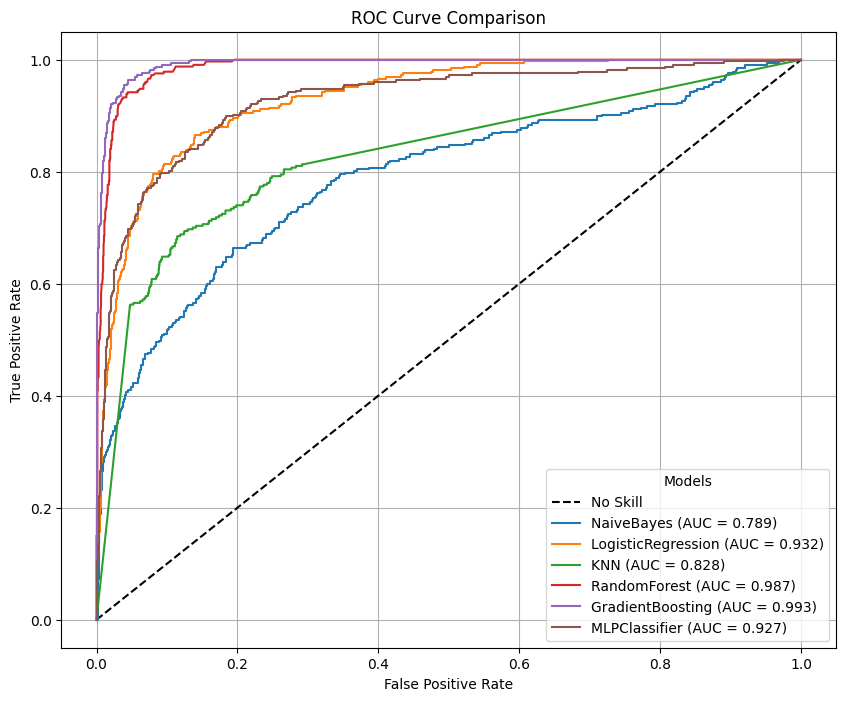

In [ ]:
best_models.append(best_mlp)
model_names.append('MLPClassifier')
Xs_test.append(X_test_scaled)

get_model_roc(best_models, Xs_test, model_names, y_test)


# Finding Important Features

In [ ]:
# Access the trained Gradient Boosting model from the list of best_models
gradient_boosting_model = [model for name, model in zip(model_names, best_models) if name == "GradientBoosting"][0]

# Get the feature importances from the trained Gradient Boosting model
importances = gradient_boosting_model.feature_importances_


In [ ]:
# Get the feature names from the preprocessed data
feature_names = [f for f in pipeline_fe.named_steps['preprocessor'].get_feature_names_out()]

# Get the indices of the sorted importances
indices = np.argsort(importances)[-25:]

# Prepare the data for plotting
sorted_features = np.array(feature_names)[indices]
sorted_importances = importances[indices]

sorted_features


array(['cat__Marital_Status_Unknown', 'cat__Education_Level_Graduate',
       'num__Months_on_book', 'num__Dependent_count',
       'cat__Education_Level_High School',
       'remainder__Actual_Credit_Utilization', 'remainder__Amt_Chng_Rate',
       'cat__Marital_Status_Single', 'num__Avg_Open_To_Buy',
       'num__Credit_Limit', 'num__Customer_Age',
       'remainder__Ct_Chng_Rate', 'remainder__Inactive_Months_Ratio',
       'cat__Marital_Status_Married', 'num__Total_Revolving_Bal',
       'num__Contacts_Count_12_mon', 'num__Total_Amt_Chng_Q4_Q1',
       'num__Gender', 'num__Months_Inactive_12_mon',
       'num__Total_Ct_Chng_Q4_Q1', 'num__Total_Trans_Amt',
       'num__Total_Relationship_Count',
       'remainder__Utilized_Credit_Limit',
       'remainder__Avg_Transaction_Amt', 'num__Total_Trans_Ct'],
      dtype='<U36')

<ipython-input-35-095d73a73971>:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



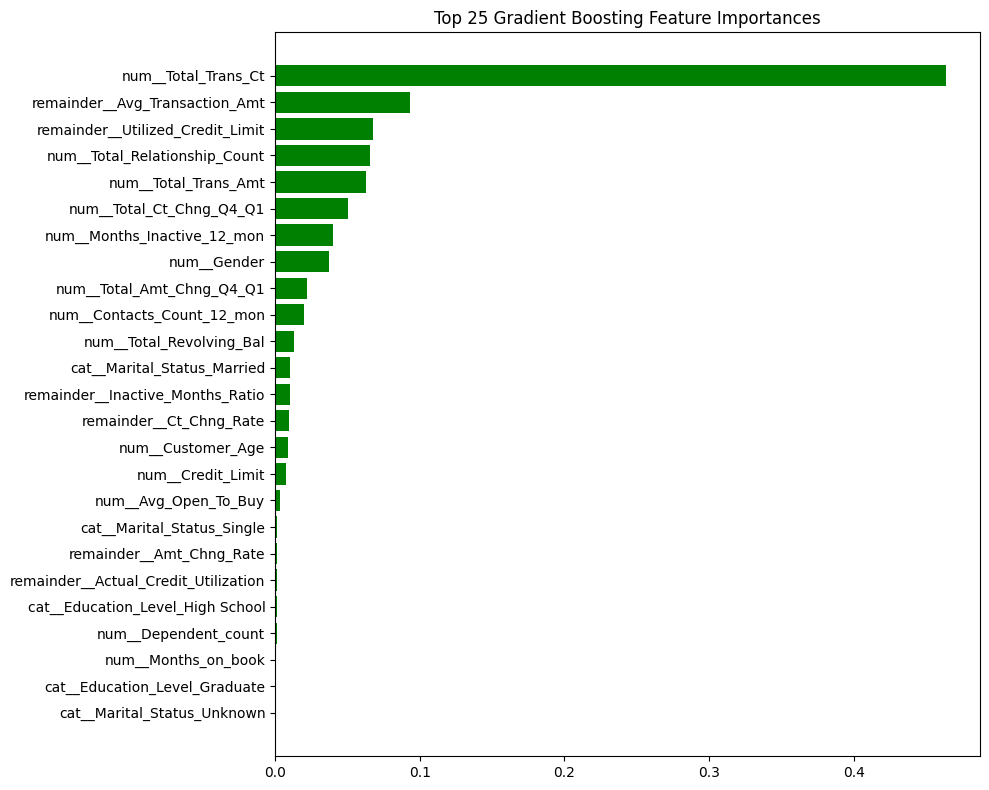

In [ ]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))
y_ticks = np.arange(0, len(sorted_features))
ax.barh(y_ticks, sorted_importances, color='green')
ax.set_yticklabels(sorted_features)
ax.set_yticks(y_ticks)
ax.set_title("Top 25 Gradient Boosting Feature Importances")
fig.tight_layout()
plt.show()


In [ ]:
top_indices = np.argsort(importances)[-17:]  # Get the last 17 features based on importance
top_features = np.array(feature_names)[top_indices]
print("Top 17 features:", top_features)

Top 17 features: ['num__Avg_Open_To_Buy' 'num__Credit_Limit' 'num__Customer_Age'
 'remainder__Ct_Chng_Rate' 'remainder__Inactive_Months_Ratio'
 'cat__Marital_Status_Married' 'num__Total_Revolving_Bal'
 'num__Contacts_Count_12_mon' 'num__Total_Amt_Chng_Q4_Q1' 'num__Gender'
 'num__Months_Inactive_12_mon' 'num__Total_Ct_Chng_Q4_Q1'
 'num__Total_Trans_Amt' 'num__Total_Relationship_Count'
 'remainder__Utilized_Credit_Limit' 'remainder__Avg_Transaction_Amt'
 'num__Total_Trans_Ct']


# Ensemble

In [ ]:
from sklearn.ensemble import StackingClassifier

mlp = MLPClassifier(
    activation='relu', alpha=0.005, hidden_layer_sizes=(30,),
    learning_rate='constant', learning_rate_init=0.01, solver='adam',
    random_state=42, max_iter=10000, n_iter_no_change=3
)

# Define base models with their best tuned parameters
base_models = [
    ('NaiveBayes', GaussianNB()),
    ('LogisticRegression', LogisticRegression(C=1, random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=3, metric='manhattan', weights='distance')),
    ('RandomForest', RandomForestClassifier(max_depth=None, min_samples_split=2, n_estimators=500, random_state=42)),
    ('GradientBoosting', GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=200, random_state=42)),
    ('MLP', mlp)
]

# Define the meta-model
meta_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)

# Create the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5, n_jobs=-1)

# Train the stacking classifier on the SMOTE-adjusted training data
stacking_classifier.fit(X_train_smote, y_train_smote)

# Predict on the test data and evaluate accuracy
y_pred = stacking_classifier.predict(X_test_fe)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy for Stacking Classifier: {test_accuracy:.2f}")

Test Accuracy for Stacking Classifier: 0.94


Model: Stacking Classifier
Confusion Matrix:


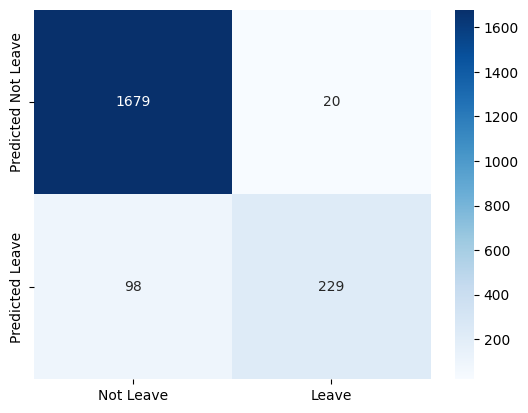

Accuracy: 0.94
Classification Report:
+--------------+-------------+----------+------------+-------------+
|              |   precision |   recall |   f1-score |     support |
|--------------+-------------+----------+------------+-------------|
| 0            |    0.944851 | 0.988228 |   0.966053 | 1699        |
| 1            |    0.919679 | 0.700306 |   0.795139 |  327        |
| accuracy     |    0.941757 | 0.941757 |   0.941757 |    0.941757 |
| macro avg    |    0.932265 | 0.844267 |   0.880596 | 2026        |
| weighted avg |    0.940788 | 0.941757 |   0.938467 | 2026        |
+--------------+-------------+----------+------------+-------------+


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from tabulate import tabulate

# Predict on the test data using the stacking classifier
y_pred = stacking_classifier.predict(X_test_fe)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
clf_report = classification_report(y_test, y_pred, output_dict=True)

# Print formatted outputs
print(f"{'='*30}\nModel: Stacking Classifier\n{'='*30}")
print("Confusion Matrix:")
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Not Leave', 'Leave'], yticklabels=['Predicted Not Leave', 'Predicted Leave'])
plt.show()

print(f"Accuracy: {acc:.2f}")
print("Classification Report:")
print(tabulate(pd.DataFrame(clf_report).T, headers='keys', tablefmt='psql'))

# Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score


# Initialize a list to store the performance of each model
model_performance = []

# Loop through each model to get predictions and calculate metrics
for model, X_test_fe, model_name in zip(best_models, Xs_test, model_names):
    # Predict the responses for the test dataset
    y_pred = model.predict(X_test_fe)

    # Predict the probabilities on the test set for AUC
    y_probs = model.predict_proba(X_test_fe)[:, 1]

    # Calculate AUC
    auc_score = roc_auc_score(y_test, y_probs)

    # Compute confusion matrix and other performance metrics
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)

    # Get precision, recall, fscore, support
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)

    # Add model metrics to the dictionary
    performance_dict = {
        'Model': model_name,
        'Accuracy': acc,
        'Precision': precision[1],  # Index 1 for the positive class
        'Recall': recall[1],        # Index 1 for the positive class
        'F1-Score': fscore[1],      # Index 1 for the positive class
        'AUC': auc_score
    }

    # Append the performance metrics of the current model to the list
    model_performance.append(performance_dict)

# Convert model_performance into a DataFrame
performance_df = pd.DataFrame(model_performance)

# Display the performance of all models
print(performance_df)

                Model  Accuracy  Precision    Recall  F1-Score       AUC
0          NaiveBayes  0.769003   0.377391  0.663609  0.481153  0.788609
1  LogisticRegression  0.865252   0.554656  0.837920  0.667479  0.931669
2                 KNN  0.836130   0.494600  0.700306  0.579747  0.828426
3        RandomForest  0.958045   0.892857  0.840979  0.866142  0.987236
4    GradientBoosting  0.967917   0.904321  0.896024  0.900154  0.992510
5       MLPClassifier  0.915597   0.825000  0.605505  0.698413  0.926892


Best Model Based on F1-Score:
Model        GradientBoosting
Accuracy             0.967917
Precision            0.904321
Recall               0.896024
F1-Score             0.900154
AUC                   0.99251
Name: 4, dtype: object


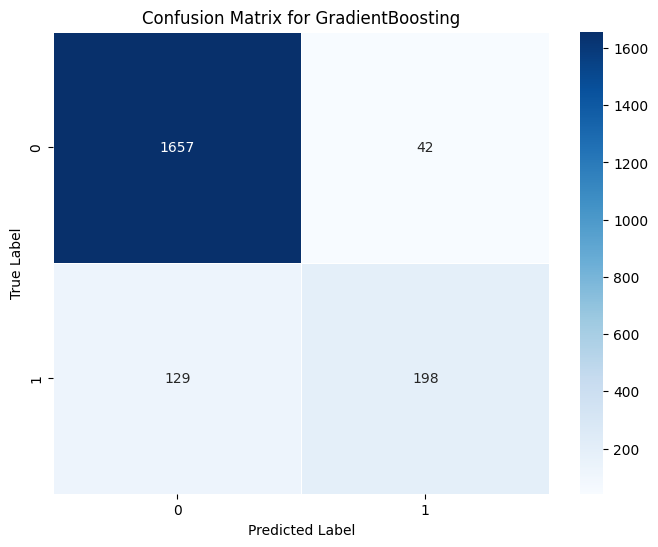

In [ ]:
# Find the best model based on the highest F1-Score for the positive class (class '1')
best_model_row = performance_df['F1-Score'].idxmax()
best_model = performance_df.iloc[best_model_row]

print("Best Model Based on F1-Score:")
print(best_model)

# Retrieve the confusion matrix for the best model
best_model_name = best_model['Model']

# Plot the confusion matrix for the best model using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', linewidths=.5)
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Cost Matrix Explanation:
If we predict a customer will close their account and they do (True Positive) we incur a cost of the retention bonus (retention_bonus_cost),
but we also retain the benefits of them staying which could be (benefit_of_retention).
If we predict a customer will close their account but they don't (False Positive), we unnecessarily spend the retention bonus (retention_bonus_cost).
If we predict a customer will not close their account and they do (False Negative), we lose the potential benefits without spending the retention bonus.


In [ ]:
# Estimate retention costs and benefits base on assumptions
retention_bonus_cost = 200
benefit_of_retention = 1000

# Define the cost matrix
cost_matrix = pd.DataFrame({
    'Does not Close': [-retention_bonus_cost + benefit_of_retention, 0],
    'Close Account': [-retention_bonus_cost, 0]
}, index=['Predicted to Close', 'Predicted to Open'])

print("Sample Cost Matrix:")
print(cost_matrix)

Sample Cost Matrix:
                    Does not Close  Close Account
Predicted to Close             800           -200
Predicted to Open                0              0


# Cost-Benefit Analysis

In [ ]:
# Compute the costs and benefits based on the confusion matrix
TP = cm[1, 1]
FP = cm[0, 1]
costs = FP * retention_bonus_cost
benefits = TP * benefit_of_retention - costs

# Print the confusion matrix, accuracy and classification report
print(f"Confusion Matrix:\n{cm}")
print(f"Accuracy: {acc:.2f}")
print(f"Classification Report:\n{clf_report}")
print(f"Estimated Benefits: {benefits}")
print(f"Estimated Costs: {costs}")

# Evaluate the cost-benefit at different thresholds
thresholds = np.linspace(0.1, 0.9, 3)
for t in thresholds:
    # Adjust threshold for classification
    y_pred_t = (y_probs > t).astype(int)

    # Recalculate the confusion matrix and derive new costs and benefits
    cm_t = confusion_matrix(y_test, y_pred_t)
    TP_t = cm_t[1, 1]
    FP_t = cm_t[0, 1]
    costs_t = FP_t * retention_bonus_cost
    benefits_t = TP_t * benefit_of_retention - costs_t

    print(f"\nThreshold: {t}")
    print(f"Confusion Matrix:\n{cm_t}")
    print(f"Benefits at threshold {t}: {benefits_t}")
    print(f"Costs at threshold {t}: {costs_t}")

Confusion Matrix:
[[1657   42]
 [ 129  198]]
Accuracy: 0.92
Classification Report:
{'0': {'precision': 0.9448508722566122, 'recall': 0.9882283696291937, 'f1-score': 0.9660529344073648, 'support': 1699}, '1': {'precision': 0.9196787148594378, 'recall': 0.7003058103975535, 'f1-score': 0.7951388888888888, 'support': 327}, 'accuracy': 0.9417571569595261, 'macro avg': {'precision': 0.932264793558025, 'recall': 0.8442670900133735, 'f1-score': 0.8805959116481268, 'support': 2026}, 'weighted avg': {'precision': 0.9407880413242943, 'recall': 0.9417571569595261, 'f1-score': 0.9384671037634648, 'support': 2026}}
Estimated Benefits: 189600
Estimated Costs: 8400

Threshold: 0.1
Confusion Matrix:
[[1270  429]
 [  23  304]]
Benefits at threshold 0.1: 218200
Costs at threshold 0.1: 85800

Threshold: 0.5
Confusion Matrix:
[[1657   42]
 [ 129  198]]
Benefits at threshold 0.5: 189600
Costs at threshold 0.5: 8400

Threshold: 0.9
Confusion Matrix:
[[1692    7]
 [ 275   52]]
Benefits at threshold 0.9: 50600

###Impact on Cost/Benefit Information:

Lower Cutoff: Targets more customers, increasing upfront costs, but potentially securing more revenue by preventing churn.

Higher Cutoff: Targets fewer customers, saving on retention costs, but risking more churn.

###Determined by Marketing Budget:

Big Bank with a Large Marketing Budget: Can afford to set a lower cutoff, targeting more customers with retention offers because the budget allows for more expansive customer outreach.

Small Bank with a Limited Marketing Budget: Needs to be more selective and set a higher cutoff, focusing on those most likely to churn to ensure the budget is spent on those customers most in need of intervention.

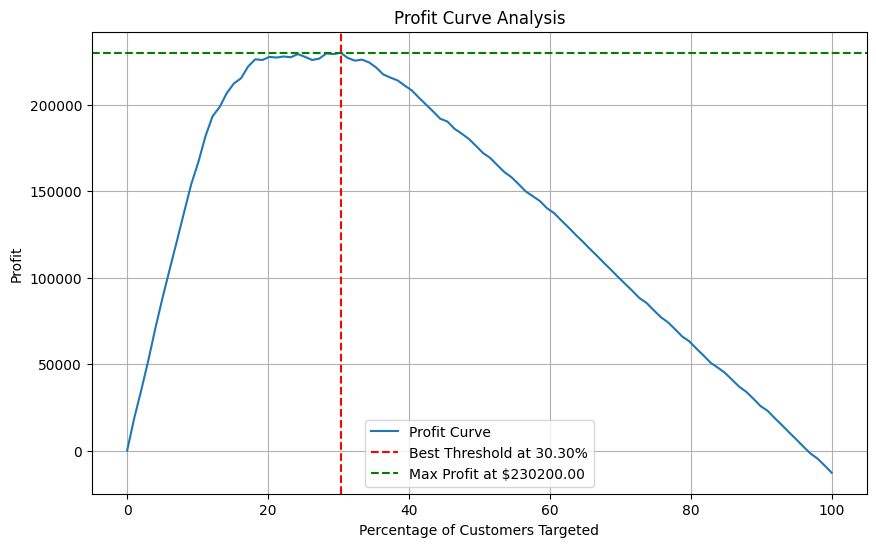

Maximum profit of $230200.00 is achieved at a threshold of: 30.30%
Number of customers targeted at max profit: 613


In [ ]:
from sklearn.metrics import roc_curve, auc

# Sort the test set by predicted probability of churn
sorted_indices = np.argsort(y_probs)[::-1]
X_test_sorted = X_test_fe[sorted_indices]
y_test_sorted = y_test.values[sorted_indices]

# Calculate profits for each threshold
thresholds = np.linspace(0, 1, 100)
profits = []
max_profit = -np.inf
best_threshold = 0
num_customers_targeted_at_max_profit = 0

# Calculate profits for each threshold and find the best threshold
for threshold in thresholds:
    num_customers_targeted = int(threshold * len(y_probs))
    y_pred = np.zeros(len(y_probs))
    y_pred[:num_customers_targeted] = 1

    TP = np.sum((y_pred == 1) & (y_test_sorted == 1))
    FP = num_customers_targeted - TP
    profit = (TP * benefit_of_retention) - (FP * retention_bonus_cost)
    profits.append(profit)

    if profit > max_profit:
        max_profit = profit
        best_threshold = threshold
        num_customers_targeted_at_max_profit = num_customers_targeted

# Plot the profit curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds * 100, profits, label='Profit Curve')
plt.xlabel('Percentage of Customers Targeted')
plt.ylabel('Profit')
plt.title('Profit Curve Analysis')
plt.axvline(x=best_threshold * 100, color='red', linestyle='--', label=f'Best Threshold at {best_threshold * 100:.2f}%')
plt.axhline(y=max_profit, color='green', linestyle='--', label=f'Max Profit at ${max_profit:.2f}')
plt.legend()
plt.grid(True)
plt.show()

print(f"Maximum profit of ${max_profit:.2f} is achieved at a threshold of: {best_threshold * 100:.2f}%")
print(f"Number of customers targeted at max profit: {num_customers_targeted_at_max_profit}")
